# Problem Statement

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 

1. Explore and visualize the dataset.
2. Build a linear regression model to predict the prices of used cars.
3. Generate a set of insights and recommendations that will help the business.

# Data Dictionary 

1. S.No. : Serial Number
2. Name : Name of the car which includes Brand name and Model name
3. Location : The location in which the car is being sold or is available for purchase Cities
4. Year : Manufacturing year of the car
5. Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
6. Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
7. Transmission : The type of transmission used by the car. (Automatic / Manual)
8. Owner : Type of ownership
9. Mileage : The standard mileage offered by the car company in kmpl or km/kg
10. Engine : The displacement volume of the engine in CC.
11. Power : The maximum power of the engine in bhp.
12. Seats : The number of seats in the car.
13. New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
14. Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

In [1]:
# helps making the Python code more structured automatically
%load_ext nb_black

<IPython.core.display.Javascript object>

# Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stats


import warnings

warnings.filterwarnings("ignore")

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# To build linear regression_model
from sklearn.linear_model import LinearRegression

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# For z-score for treating outliers
# from scipy import stats

# To do split data for linear regression model
from sklearn.model_selection import train_test_split

# To build linear regression model with statsmodels
import statsmodels.api as sm

# To test multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To test homoscedasticity
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

<IPython.core.display.Javascript object>

# Overview of the Data

In [3]:
# Load the data into pandas dataframe
data = pd.read_csv("used_cars_data.csv")

# make copy of data to work on
df = data.copy()
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


<IPython.core.display.Javascript object>

In [4]:
# check # of rows and columns
df.shape

(7253, 14)

<IPython.core.display.Javascript object>

In [5]:
# check column types and number of values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


<IPython.core.display.Javascript object>

In [6]:
df.isna().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

<IPython.core.display.Javascript object>

**Insights:**
* There are 7253 rows and 14 columns.
* Dependent variable is 'Price'.
* The columns 'Location', 'Fuel_Type', 'Transmission' and 'Owner_Type' are all of object type and should be converted to categorical values.
* The column "Seats" and "Year" could also benefit from being treated as a categorical value instead of numerical.
* The columns 'Mileage', 'Engine' and 'Power' are all of object type and should be coverted to numeric values.
* The 'New_Price' column has the most null values (>50%), therefore it would be best to drop this column completely.
* The columns 'Mileage', 'Engine', 'Power', 'Seats', and 'Price' have null values, we will need to figure out how we want to treat those null values.
* The column 'Mileage' has a min of 0 which cannot be possible, so I will treat this as a missing value as well.

**Converting variable types**

In [7]:
# converting 'object' types better suited as numerical variables
def mileage_to_num(mileage):
    """In the mileage column I'm replacing the terminals 'km/kg'
    and 'kmpl' with the empty string and converting to a float.
    Non-strings are np.nans and are kept as np.nans.
    No conversion needed since 'Fuel_type. column enables us to
    identify this information."""
    if isinstance(mileage, str):
        return float(mileage.replace("km/kg", "").replace("kmpl", ""))
    else:
        return np.nan


def engine_to_num(engine):
    """In the engine column I'm replacing the terminal 'CC' with
    the empty string and converting to a float. Non-strings are
    np.nans and are kept as np.nans."""
    if isinstance(engine, str):
        return float(engine.replace("CC", ""))
    else:
        return np.nan


def power_to_num(power):
    """In the power column I'm replacing the terminal 'bhp' with
    the empty string and converting to a float. Non-strings are
    np.nans and are kept as np.nans."""
    if isinstance(power, str):
        if "null" in power:
            return np.nan
        return float(power.replace("bhp", ""))
    else:
        return np.nan


# actual conversion of columns
col_transforms = {
    "Mileage": mileage_to_num,
    "Engine": engine_to_num,
    "Power": power_to_num,
}

for k, v in col_transforms.items():
    df[k] = df[k].map(v)

<IPython.core.display.Javascript object>

In [8]:
# converting 'object' types better suited as categorical variables
# df["Name"] = df["Name"].astype("category")
df["Location"] = df["Location"].astype("category")
df["Year"] = df["Year"].astype("category")
df["Fuel_Type"] = df["Fuel_Type"].astype("category")
df["Transmission"] = df["Transmission"].astype("category")
df["Owner_Type"] = df["Owner_Type"].astype("category")
# df["Seats"] = df["Seats"].astype("category")

<IPython.core.display.Javascript object>

**Missing Value Treatment**

In [9]:
# replace 0 mileage with nan
df["Mileage"].replace(0, np.nan, inplace=True)

<IPython.core.display.Javascript object>

In [10]:
# since 'Price' is the dependent variable, instead of imputing data for the missing
# values, I will drop the data instead
df = df.dropna(subset=["Price"])

# I will also drop the 'S.No.' column since it is just an ID number and tells us no useful information
df.drop(["S.No."], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [11]:
# we will replace missing values in every column with its median
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(medianFiller, axis=0)

<IPython.core.display.Javascript object>

In [12]:
# 'New_Price' missing over 50% of data, therefore it would be best to drop this column completely
df.drop(["New_Price"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [13]:
df.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

<IPython.core.display.Javascript object>

**Check new data**

In [14]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


<IPython.core.display.Javascript object>

In [15]:
# check column types and number of values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               6019 non-null   object  
 1   Location           6019 non-null   category
 2   Year               6019 non-null   category
 3   Kilometers_Driven  6019 non-null   int64   
 4   Fuel_Type          6019 non-null   category
 5   Transmission       6019 non-null   category
 6   Owner_Type         6019 non-null   category
 7   Mileage            6019 non-null   float64 
 8   Engine             6019 non-null   float64 
 9   Power              6019 non-null   float64 
 10  Seats              6019 non-null   float64 
 11  Price              6019 non-null   float64 
dtypes: category(5), float64(5), int64(1), object(1)
memory usage: 407.3+ KB


<IPython.core.display.Javascript object>

In [16]:
df.describe(include=["float64", "int64"]).T

,count,mean,std,min,25%,50%,75%,max
Kilometers_Driven,6019.0,58738.380296,91268.843206,171.00,34000.0,53000.00,73000.00,6500000.00
Mileage,6019.0,18.340598,4.151148,6.40,15.4,18.20,21.10,33.54
Engine,6019.0,1620.509221,599.635458,72.00,1198.0,1493.00,1969.00,5998.00
Power,6019.0,112.883539,53.283701,34.20,78.0,97.70,138.03,560.00
Seats,6019.0,5.276790,0.806346,0.00,5.0,5.00,5.00,10.00
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.00


<IPython.core.display.Javascript object>

In [17]:
df.describe(include=["category"]).T

,count,unique,top,freq
Location,6019,11,Mumbai,790
Year,6019,22,2014,797
Fuel_Type,6019,5,Diesel,3205
Transmission,6019,2,Manual,4299
Owner_Type,6019,4,First,4929


<IPython.core.display.Javascript object>

**Insights**
* The 'Location' column has 11 unique values, meaning the data is collected from 11 cities.
* The 'Transmission' column has 2 unique values, 'Manual' and 'Automatic'.
* The 'Year' ranges from 1996 to 2019.
* The average price for a used car is ~9.4 Lakh.

**Before processing the data further, I'll look at the graphical visualization first to understand it better**

# Exploratory Data Analysis

## Univariate analysis

In [18]:
# While doing univariate analysis of numerical variables we want to study their central tendency and dispersion.
# I will be using the same function from previous projects to accomplish this.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.


def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig
    bins: number of bins
    """
    sns.set(font_scale=2)
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

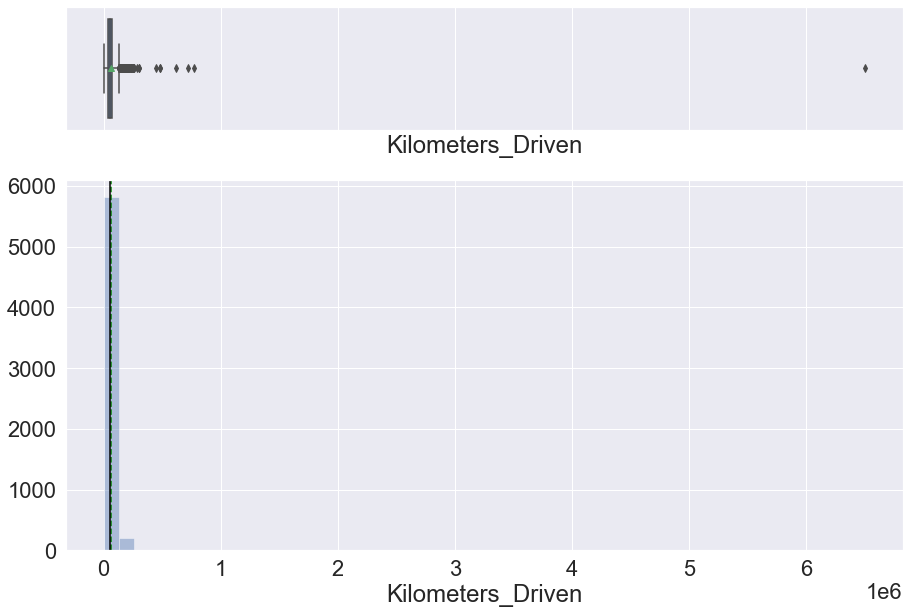

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(df.Kilometers_Driven)

**Insights**
* 'Kilometers_Driven' is right skewed heavily due to outliers.
* Mean is around 59000 KM.
* We might have to transform this later to a log-scale so it behaves better.

In [1]:
histogram_boxplot(df.Mileage)

NameError: name 'histogram_boxplot' is not defined

**Insights**
* 'Mileage' is somewhat normally distributed.
* There are a few outliers on both the left and right sides.
* The average is around 18 kmpl or km/kg.

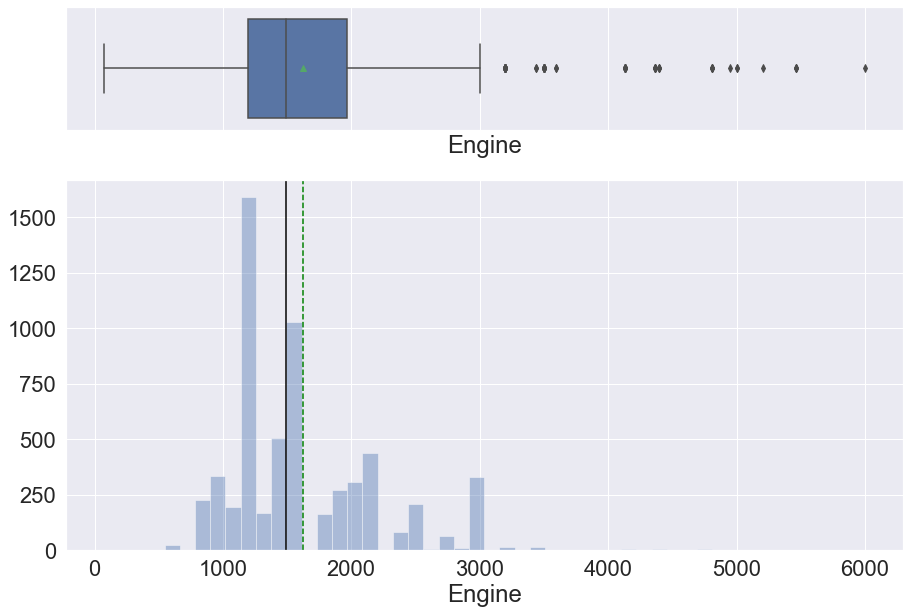

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(df.Engine)

**Insights**
* 'Engine' is right-skewed due to large outliers.
* The average is around 1600 CC.

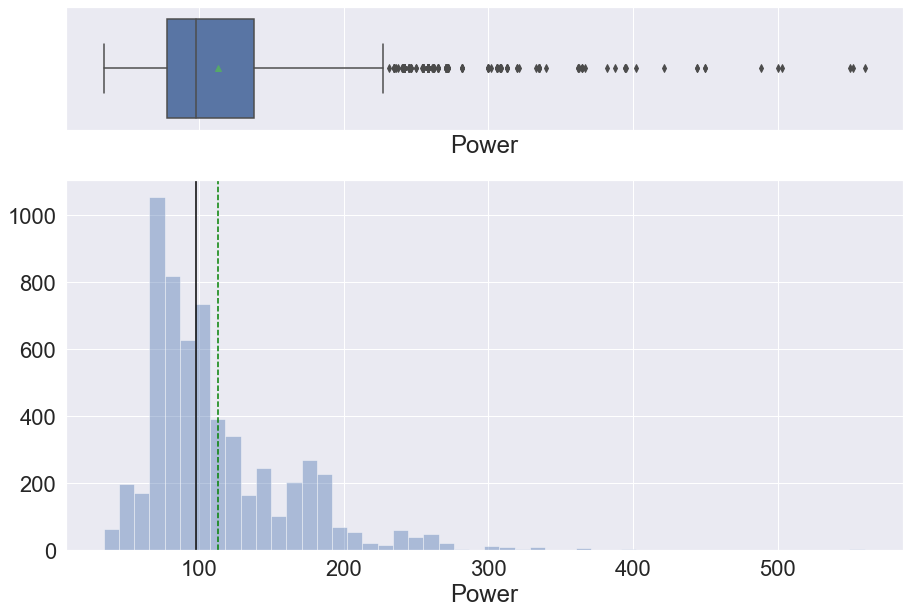

<IPython.core.display.Javascript object>

In [22]:
histogram_boxplot(df.Power)

**Insights**
* 'Power' is also right-skewed because of many large outliers, this makes sense as there are probably a few cars for sale that are higher end and therefore have more powerful engines than average.
* The average is around 112 bhp.

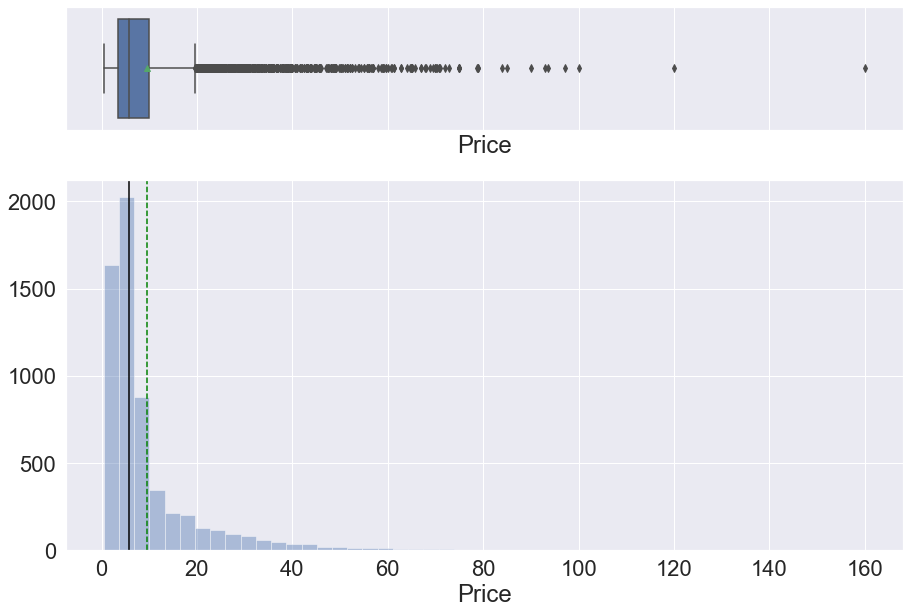

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(df.Price)

**Insights**
* The 'Price' is right-skewed which makes since for the same reason 'Engine; is right-skewed, the outliers are higher end cars which are more poweful and therefore more expensive.
* On average the price of a used car is 9.4 Lakhs.


In [24]:
# Function to create barplots that indicate percentage for each category.
def perc_on_bar(feature, t):
    """
    feature: categorical feature
    t: title for plot
    """
    sns.set(font_scale=1)
    plt.figure(figsize=(15, 10))
    ax = sns.countplot(x=feature, palette="winter")
    ax.set_title(t, fontsize=30)

    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height() + 0.5  # height of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percentage
    plt.show()  # show the plot

<IPython.core.display.Javascript object>

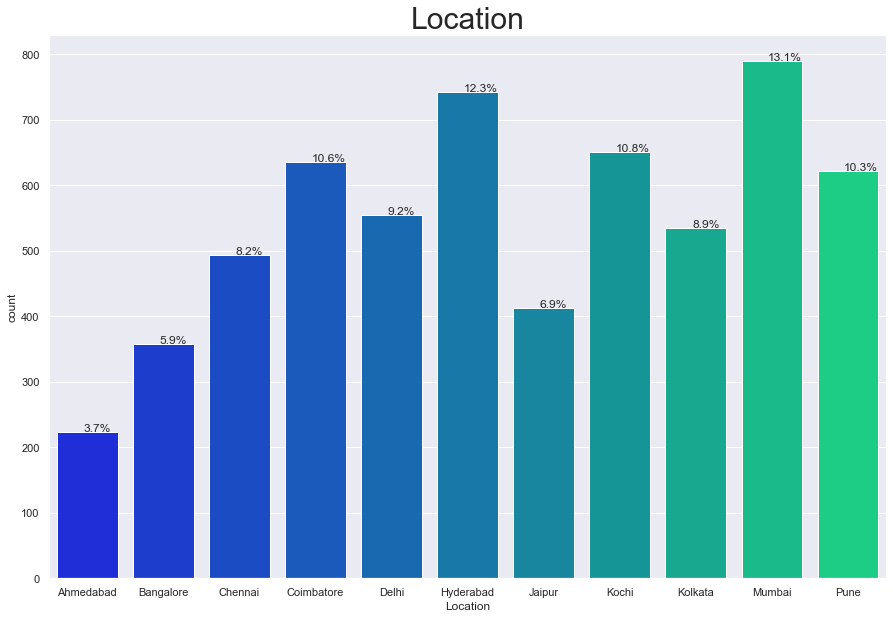

<IPython.core.display.Javascript object>

In [25]:
perc_on_bar(df.Location, "Location")

**Insights**
* Most used cars are being sold in Mumbai and Hyderabad, I'm thinking that these are most likely larger cities with higher populations compared to Ahmedabad and Bangalore which have the lowest percentage of used cars for sale.

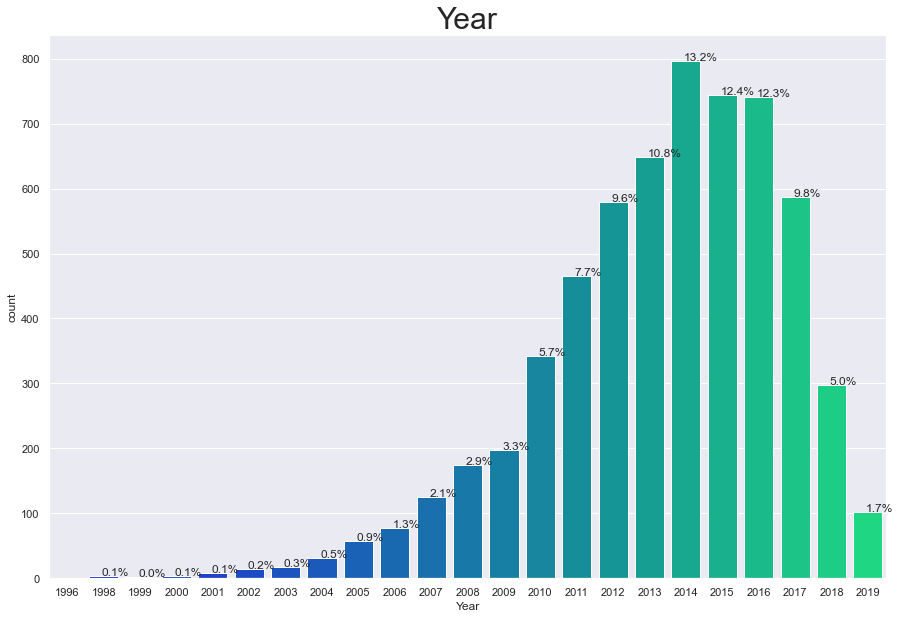

<IPython.core.display.Javascript object>

In [26]:
perc_on_bar(df.Year, "Year")

**Insights**
* The majority of used cars being sold are from the years 2014-2015.
* There is a steady drop of the nummber of cars from before 2014 being sold and a pretty steep drop in number from cars after 2015.

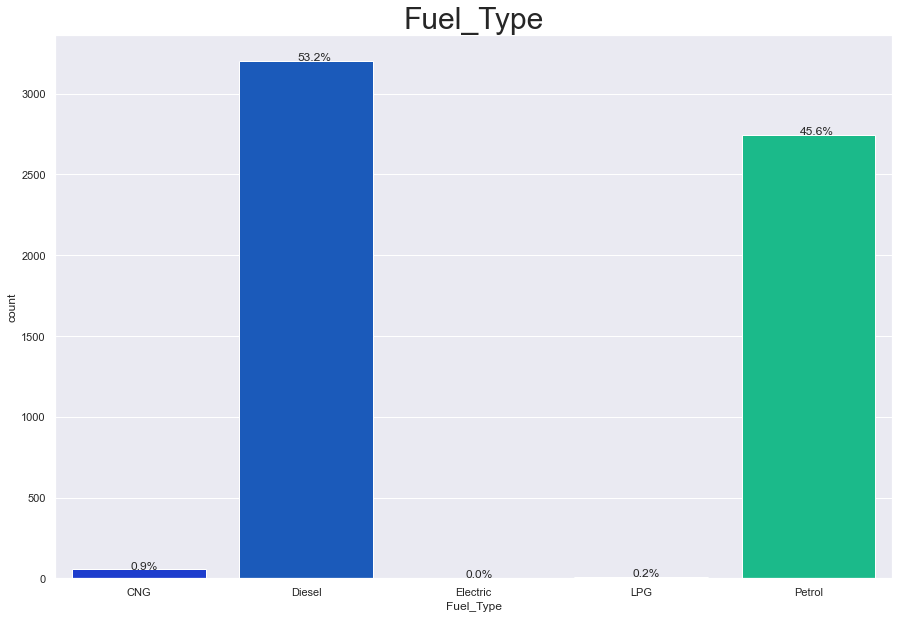

<IPython.core.display.Javascript object>

In [27]:
perc_on_bar(df.Fuel_Type, "Fuel_Type")

**Insights** 
* The used car market is overwhelming Diesel and Petrol cars, almost none being CNG, Electric and LGP fuel type cars. 

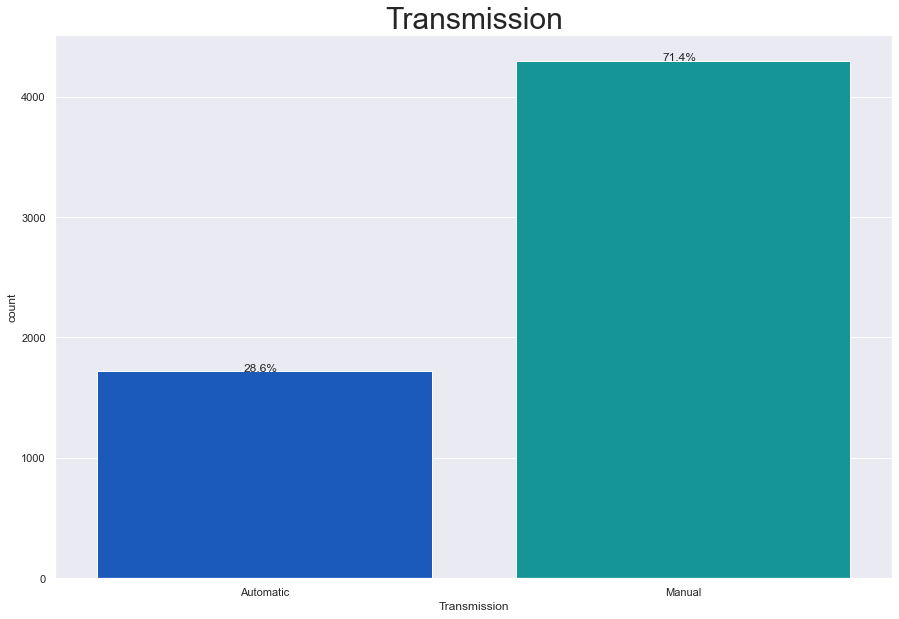

<IPython.core.display.Javascript object>

In [28]:
perc_on_bar(df.Transmission, "Transmission")

**Insights**
* There's a higher number of manual transmission cars being sold than automatic.

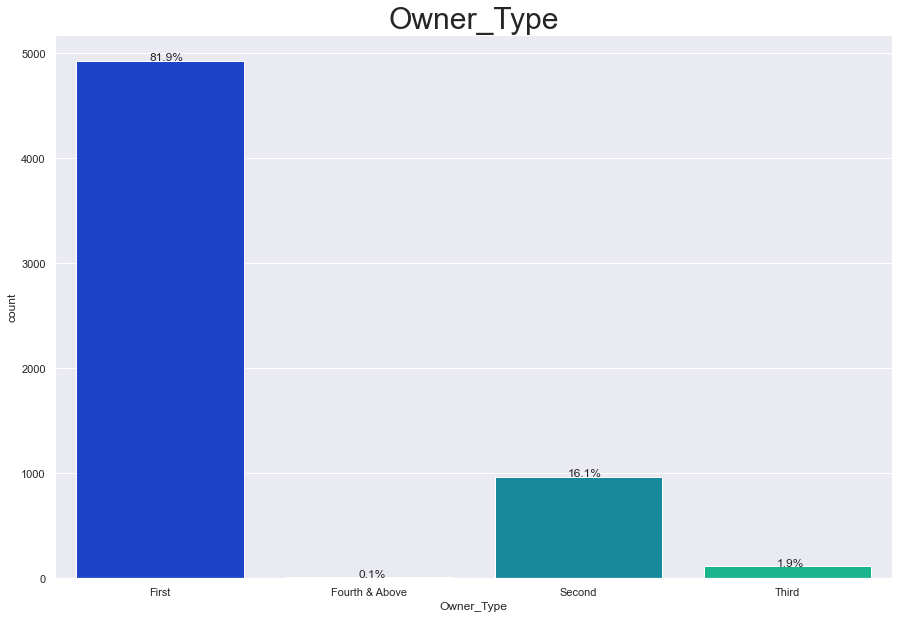

<IPython.core.display.Javascript object>

In [29]:
perc_on_bar(df.Owner_Type, "Owner_Type")

**Insights**
* 82% of the cars being resold have only had one owner previously and the higher the number of previous owners, the lower the number of cars there are being sold. 
* This could have to do with the year of the car as well, we saw there weren't a lot of older cars for sale, and the older the car, the more owners it could possibly have. 

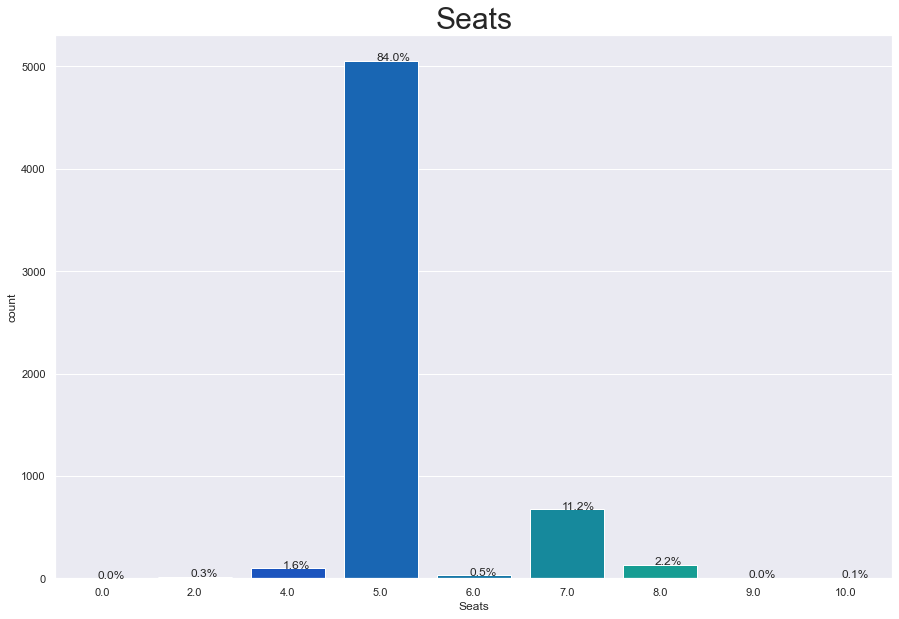

<IPython.core.display.Javascript object>

In [30]:
perc_on_bar(df.Seats, "Seats")

**Insights**
* Most of the cars being sold are 5 seaters.

## Bivariate Analysis

**Check for correlation between numerical values**

<AxesSubplot:>

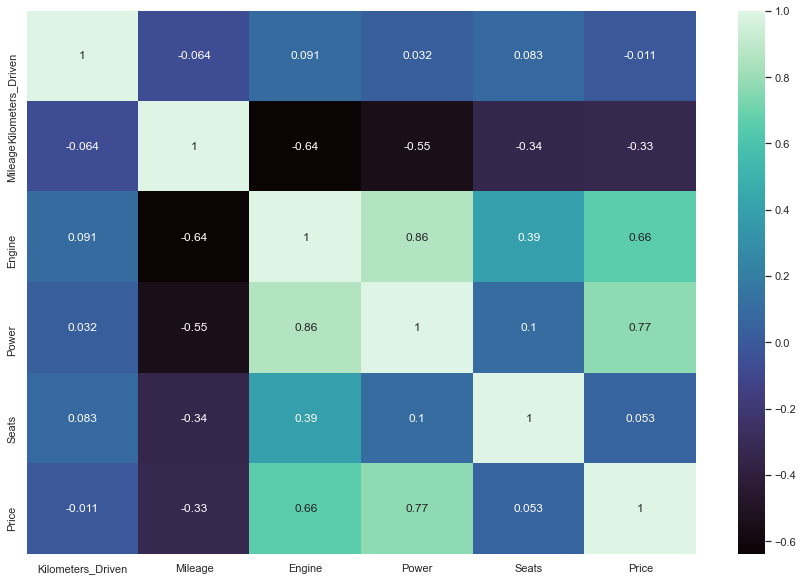

<IPython.core.display.Javascript object>

In [31]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
corr = df[numeric_columns].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap="mako", annot=True)

**Insights**
* 'Power' and 'Engine' seem to have the strongest positive relationship with price, as well with each other.
* 'Mileage' has a more negative correlation with Price, however it's not as strong.

**Check for correlation between categorical variables**

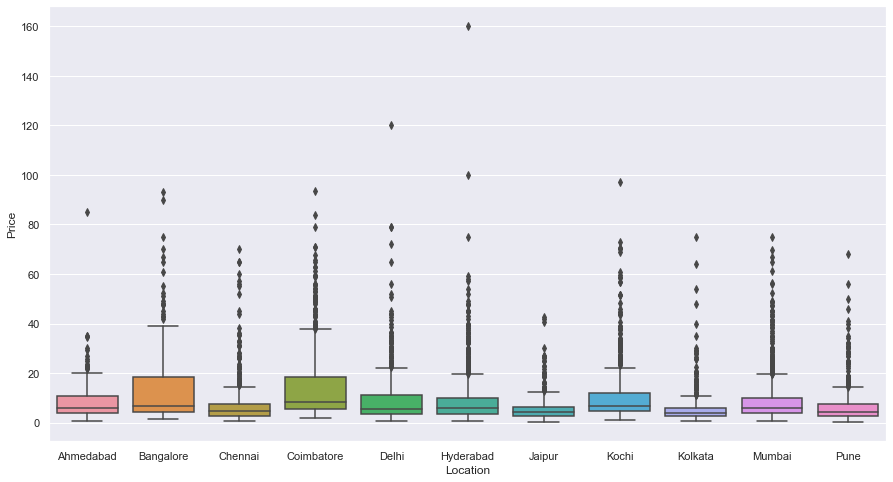

<IPython.core.display.Javascript object>

In [32]:
# Price vs Location
plt.figure(figsize=(15, 8))
sns.boxplot(x="Location", y="Price", data=df)
plt.show()

**Insights**
* While there are some outliers and some variation between price in cities, the average price is around the same and I wouldn't consider this variable a huge determining factor in the price of the car.

<AxesSubplot:xlabel='Year', ylabel='Price'>

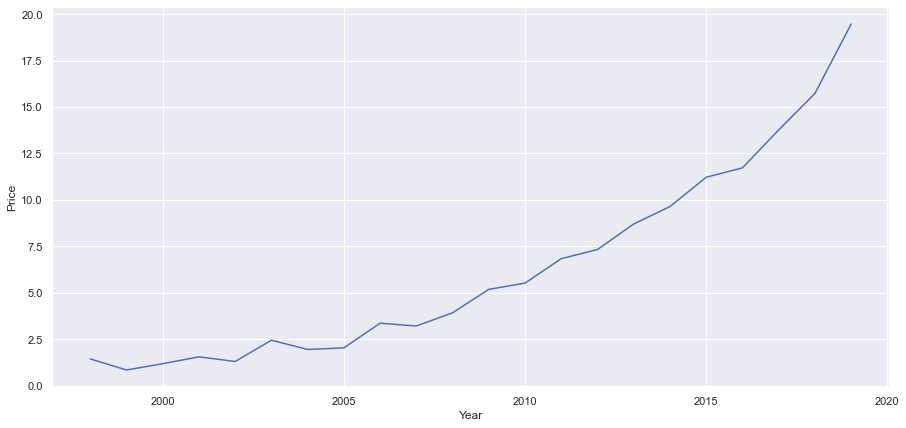

<IPython.core.display.Javascript object>

In [33]:
# Price vs Year
plt.figure(figsize=(15, 7))
sns.lineplot(x="Year", y="Price", data=df, ci=None)

**Insights** 
* Newer cars are more significantly more expensive, the year of the car seems to have a strong correlation to the price unsurprisngly.  

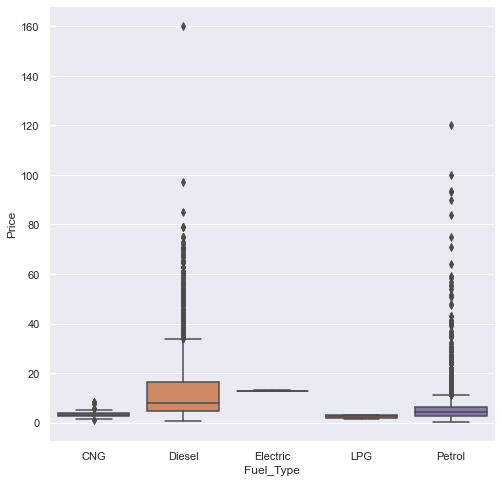

<IPython.core.display.Javascript object>

In [34]:
# Fuel Type vs Price
plt.figure(figsize=(8, 8))
sns.boxplot(x="Fuel_Type", y="Price", data=df)
plt.show()

**Insights**
* Not a huge variance here considering the majority of the cars are diesel or petrol.
* Diesel cars appear to be more expensive overall, but not by a staggering amount.

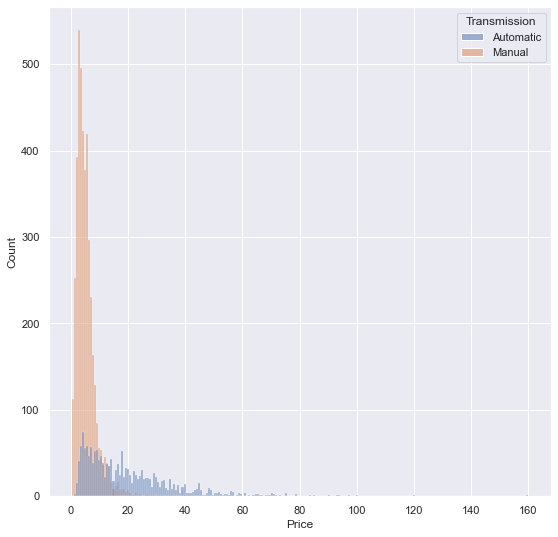

<IPython.core.display.Javascript object>

In [35]:
# Transmission vs Price
plt.figure(figsize=(9, 9))
sns.histplot(data=df, x="Price", hue="Transmission")
plt.show()

**Insights**
* Along with there being more manual transmission cars, the price for those cars is significantly lower than automatic transmission cars.
* I would consider this variable to be somewhat correlated with the price.

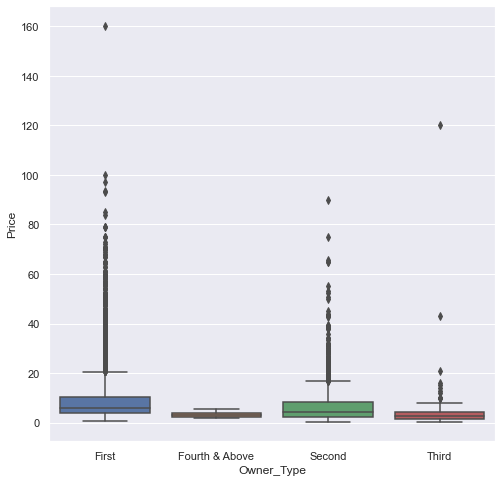

<IPython.core.display.Javascript object>

In [36]:
plt.figure(figsize=(8, 8))
sns.boxplot(x="Owner_Type", y="Price", data=df)
plt.show()

**Insights**
* Not a strong correlation here, the number of owners doesn't seem to be an important factor in the car pricing.

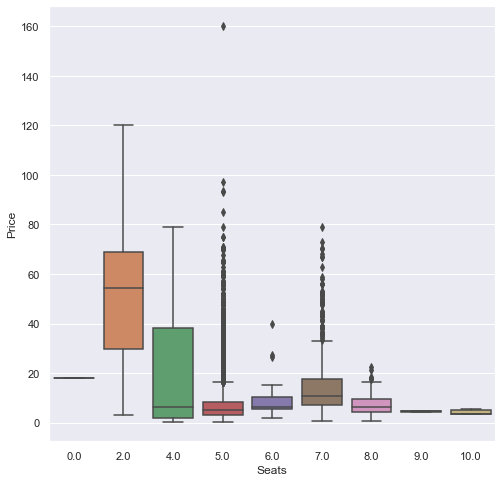

<IPython.core.display.Javascript object>

In [37]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=df, y="Price", x="Seats")
plt.show()

**Insights**
* Cars with two seats are significantly more expensive than the rest, this is probably because more sports cars and high-end cars with powerful engines are two-seaters and therefore more expensive.

**Let's look at the graphs of a few variables that are highly correlated with Price**

<AxesSubplot:xlabel='Power', ylabel='Price'>

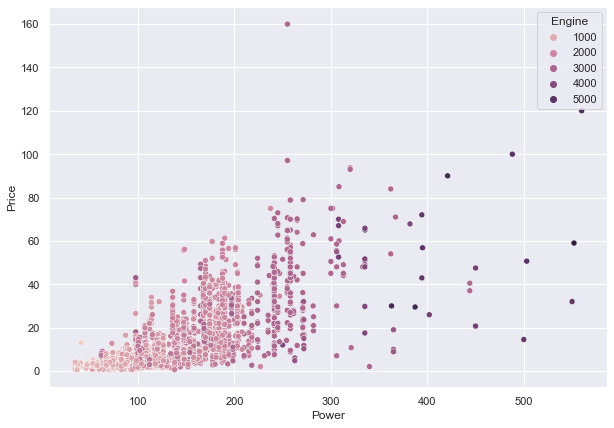

<IPython.core.display.Javascript object>

In [38]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="Price", x="Power", hue="Engine", data=df)

**Insights**
* As we noted earlier, more powerful cars with stronger engines are higher end and therefore cost more than other used cars. 

## Data Preperation for Modeling

**Feature Engineering**


To start I'm going to be spliting the 'Name' column in order to extract the Brand and drop everything else. For the 
purpose of this regression model, I will only be using the Brand as a category and not any specific models for 
the sake of simplicity. Doing this will greatly reduce the number of columns after hot-encoding.

In [39]:
# split name variable in two
namesplt = df["Name"].str.split(" ", n=1, expand=True)
namesplt.head()

,0,1
0,Maruti,Wagon R LXI CNG
1,Hyundai,Creta 1.6 CRDi SX Option
2,Honda,Jazz V
3,Maruti,Ertiga VDI
4,Audi,A4 New 2.0 TDI Multitronic


<IPython.core.display.Javascript object>

In [40]:
# drop everything but the Brand name and have append that to dataset
df.drop(["Name"], axis=1, inplace=True)
df["Brand"] = namesplt[0]

del namesplt

<IPython.core.display.Javascript object>

In [41]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


<IPython.core.display.Javascript object>

Next I'm going to be reducing the 'Location' column from cities to regions in order to include this variable in the regression model more easily. This will reduce the number of columns from 10 to 3 once hot-encoded later.

In [42]:
# function to convert the cities to their respective regions
def city_to_region(cn):
    """
    cn : name of city for which region is needed
    """
    if cn in ("Delhi", "Jaipur"):
        return "North"
    elif cn == "Kolkata":
        return "East"
    elif cn in ("Ahmedabad", "Mumbai", "Pune"):
        return "West"
    else:
        return "South"

<IPython.core.display.Javascript object>

In [43]:
df["Region"] = df.Location.apply(city_to_region)

<IPython.core.display.Javascript object>

In [44]:
# drop 'Location' to reduce data to 'Region' for dummy variable creation
df.drop(["Location"], axis=1, inplace=True)
df.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Region
0,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,West
1,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,West
2,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,South
3,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,South
4,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,South


<IPython.core.display.Javascript object>

When performing EDA I saw that the number of electric vehicles in the data set was only 2, this is a very low number and will not be useful when doing linear regression, so I will drop this data completely and reduce the number of categories in 'Fuel_Type' from 5 to 4. This will help with hot-encoding as well.

In [45]:
df.shape

(6019, 12)

<IPython.core.display.Javascript object>

In [46]:
# dropping electric car data and removing it as a category altogether
df.drop(df.loc[df["Fuel_Type"] == "Electric"].index, inplace=True)
df.Fuel_Type = df.Fuel_Type.cat.remove_categories("Electric")

<IPython.core.display.Javascript object>

In [47]:
df.shape

(6017, 12)

<IPython.core.display.Javascript object>

I've decided to convert the information from the 'Year' column to a 'Car_Age' column as seeing the variable in this form is a bit easier to interpret. I've made the assumption here that the data is from 2021.

In [48]:
def year_to_age(year):
    return 2021 - year

<IPython.core.display.Javascript object>

In [49]:
# adding 'Car_Age' column to replace 'Year'
df["Car_Age"] = df.Year.apply(year_to_age)
df.drop(["Year"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [50]:
df.head(20)

,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Region,Car_Age
0,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,West,11
1,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,West,6
2,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,South,10
3,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,South,9
4,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,South,8
5,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,2.35,Hyundai,South,9
6,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50,Nissan,North,8
7,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,17.50,Toyota,West,5
8,64430,Diesel,Manual,First,20.54,1598.0,103.60,5.0,5.20,Volkswagen,West,8
9,65932,Diesel,Manual,Second,22.30,1248.0,74.00,5.0,1.95,Tata,South,9


<IPython.core.display.Javascript object>

**Outlier Treatment**

I noticed outliers when doing the EDA and came to the decision that I'm going to handle them by capping the data at +/- 3SD based on empirical rule. 

In [51]:
# function to drop outliers based on empirical rule of +/- 3SD
def drop_numerical_outliers(df):
    """
    df : dataframe of which to remove outliers
    """
    # Will decide whether to keep data based on +/- 3SD threshold
    outliers = (
        df.select_dtypes(include=[np.number])
        .apply(lambda x: np.abs(stats.zscore(x)) < 3)
        .all(axis=1)
    )
    # Drop outliers
    df.drop(df.index[~outliers], inplace=True)

<IPython.core.display.Javascript object>

In [52]:
drop_numerical_outliers(df)

<IPython.core.display.Javascript object>

In [53]:
df.shape

(5669, 12)

<IPython.core.display.Javascript object>

I'm converting the new columns I created to categories and making sure everything is looking correct so far.

In [54]:
df["Brand"] = df["Brand"].str.title()

df["Brand"] = df["Brand"].astype("category")
df["Region"] = df["Region"].astype("category")

df.describe(include=["category"]).T

,count,unique,top,freq
Fuel_Type,5669,4,Diesel,2936
Transmission,5669,2,Manual,4145
Owner_Type,5669,4,First,4643
Brand,5669,27,Maruti,1190
Region,5669,4,South,2680
Car_Age,5669,22,7,766


<IPython.core.display.Javascript object>

Because of the data for 'Price', 'Engine', 'Power', and 'Kilometers_Driven' being skewed to the right, I'm going to perform a log transformation to get the distribution to look normal for the linear regression fitting.

In [55]:
cols_to_log = ["Price", "Engine", "Power", "Kilometers_Driven"]

<IPython.core.display.Javascript object>

In [56]:
# performing log transformation
for colname in cols_to_log:
    df[colname + "_log"] = np.log(df[colname] + 1)
df.drop(cols_to_log, axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [57]:
df.head()

,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,Brand,Region,Car_Age,Price_log,Engine_log,Power_log,Kilometers_Driven_log
0,CNG,Manual,First,26.60,5.0,Maruti,West,11,1.011601,6.906755,4.080246,11.184435
1,Diesel,Manual,First,19.67,5.0,Hyundai,West,6,2.602690,7.367077,4.845761,10.621352
2,Petrol,Manual,First,18.20,5.0,Honda,South,10,1.704748,7.090077,4.496471,10.736418
3,Diesel,Manual,First,20.77,7.0,Maruti,South,9,1.945910,7.130099,4.497139,11.373675
4,Diesel,Automatic,Second,15.20,5.0,Audi,South,8,2.930660,7.585281,4.954418,10.613271


<IPython.core.display.Javascript object>

## Building Linear Regression Model

**Initializing model**

In [58]:
# defining X and y variables
X = df.drop(["Price_log"], axis=1)
y = df[["Price_log"]]

print(X.head())
print(y.head())

  Fuel_Type Transmission Owner_Type  Mileage  Seats    Brand Region Car_Age  \
0       CNG       Manual      First    26.60    5.0   Maruti   West      11   
1    Diesel       Manual      First    19.67    5.0  Hyundai   West       6   
2    Petrol       Manual      First    18.20    5.0    Honda  South      10   
3    Diesel       Manual      First    20.77    7.0   Maruti  South       9   
4    Diesel    Automatic     Second    15.20    5.0     Audi  South       8   

   Engine_log  Power_log  Kilometers_Driven_log  
0    6.906755   4.080246              11.184435  
1    7.367077   4.845761              10.621352  
2    7.090077   4.496471              10.736418  
3    7.130099   4.497139              11.373675  
4    7.585281   4.954418              10.613271  
   Price_log
0   1.011601
1   2.602690
2   1.704748
3   1.945910
4   2.930660


<IPython.core.display.Javascript object>

In [59]:
print(X.shape)
print(y.shape)

(5669, 11)
(5669, 1)


<IPython.core.display.Javascript object>

In [60]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=["Region", "Fuel_Type", "Owner_Type", "Transmission", "Brand"],
    drop_first=True,
)
X.head()

,Mileage,Seats,Car_Age,Engine_log,Power_log,Kilometers_Driven_log,Region_North,Region_South,Region_West,Fuel_Type_Diesel,...,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,26.60,5.0,11,6.906755,4.080246,11.184435,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,19.67,5.0,6,7.367077,4.845761,10.621352,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,18.20,5.0,10,7.090077,4.496471,10.736418,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20.77,7.0,9,7.130099,4.497139,11.373675,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,15.20,5.0,8,7.585281,4.954418,10.613271,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [61]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=22
)

<IPython.core.display.Javascript object>

In [62]:
X_train.head()

,Mileage,Seats,Car_Age,Engine_log,Power_log,Kilometers_Driven_log,Region_North,Region_South,Region_West,Fuel_Type_Diesel,...,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
3045,19.27,5.0,4,7.670429,5.127648,9.323758,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2963,18.88,5.0,4,7.598900,5.220356,10.922154,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4102,16.47,5.0,9,7.089243,4.316154,10.874626,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1068,23.59,5.0,9,7.218910,4.592085,12.323860,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
3161,20.70,5.0,2,7.311218,4.744758,9.606294,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [63]:
# fitting the model on the train data (70% of the whole data)
linearregression = LinearRegression()
linearregression.fit(X_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

**Check model coefficients and intercept**

In [64]:
# checking the coefficients and intercept of the model
coef_df = pd.DataFrame(
    np.append(
        # accounting for log transformation
        np.exp(linearregression.coef_[0]) - 1,
        np.exp(linearregression.intercept_[0]) - 1,
    ),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
Mileage,-0.010896
Seats,0.072784
Car_Age,-0.084754
Engine_log,0.261399
Power_log,0.784450
Kilometers_Driven_log,-0.066605
Region_North,0.167819
Region_South,0.287995
Region_West,0.162977
Fuel_Type_Diesel,0.178411


<IPython.core.display.Javascript object>

**Check model performance**

In [65]:
# using the functions from lecture to test the model performance
# defining function for MAPE
def mape(targets, predictions):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# defining common function for all metrics
def model_perf(model, inp, out):
    """
    model: model
    inp: independent variables
    out: dependent variable
    """
    y_pred = np.exp(model.predict(inp).flatten()) - 1
    y_act = np.exp(out.values.flatten()) - 1

    return pd.DataFrame(
        {
            "MAE": mean_absolute_error(y_act, y_pred),
            "MAPE": mape(y_act, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "R^2": r2_score(y_act, y_pred),
        },
        index=[0],
    )

<IPython.core.display.Javascript object>

In [66]:
# Checking model performance on train set
print("Train Performance\n")
model_perf(linearregression, X_train, y_train)

Train Performance



,MAE,MAPE,RMSE,R^2
0,1.404681,18.419904,2.494027,0.900907


<IPython.core.display.Javascript object>

In [67]:
# Checking model performance on test set
print("Test Performance\n")
model_perf(linearregression, X_test, y_test)

Test Performance



,MAE,MAPE,RMSE,R^2
0,1.296009,17.614961,2.279274,0.910041


<IPython.core.display.Javascript object>

**Insights**
* The training and test scores are 90% and 91% respectively, so it seems the model is a good fit.
* According to the MAE score, our current model can predict price within a mean error of 1.3 Lakhs on the test data.
* According to the MAPE score, with the current model we can predict within 18% of the price.

**Linear Regression Model: statsmodel**

In [68]:
# we have to add the constant manually in statsmodel
X = sm.add_constant(X)
X_train1, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=22
)

olsmod0 = sm.OLS(y_train, X_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     1144.
Date:                Sat, 19 Jun 2021   Prob (F-statistic):               0.00
Time:                        03:30:22   Log-Likelihood:                 983.66
No. Observations:                3968   AIC:                            -1881.
Df Residuals:                    3925   BIC:                            -1611.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

<IPython.core.display.Javascript object>

**Insights**
* Variables with a negative coefficient have an inverse relationship with the price (price decreases when the other variable increases)
* Variables with a positive coefficient have a direct relationship with the price (price increases when the other variable increases)
* Any variable with a p-value less than 0.05 is considered significant, however we need to make sure that the variables aren't being affected by multicollinearity.

## Check Linear Assumptions

**Test for Multicollinearity**

In [69]:
# get the VIF scores
vif_series1 = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns
)
print("VIF Scores: \n\n{}\n".format(vif_series1))

VIF Scores: 

const                        10393.054915
Mileage                          4.037788
Seats                            2.509333
Car_Age                          2.058001
Engine_log                      11.423070
Power_log                        8.055472
Kilometers_Driven_log            1.732811
Region_North                     2.479668
Region_South                     3.538142
Region_West                      3.073332
Fuel_Type_Diesel                34.808742
Fuel_Type_LPG                    1.244500
Fuel_Type_Petrol                35.354335
Owner_Type_Fourth & Above        1.010107
Owner_Type_Second                1.147194
Owner_Type_Third                 1.099565
Transmission_Manual              2.135829
Brand_Audi                     203.486580
Brand_Bmw                      221.911630
Brand_Chevrolet                113.884215
Brand_Datsun                    14.254511
Brand_Fiat                      29.420796
Brand_Force                      4.073163
Brand_Ford          

<IPython.core.display.Javascript object>

There are a lot of values greater than 10, however we cannot drop columns we hot-encoded unless all of those columns are above 10. Because of the, the only column able to be dropped if the 'Engine' column. We noted earlier during the EDA process that 'Engine' and 'Power' are highly correlated, so it's not surprising that there would be overlap here.

In [70]:
# drop Engine and check the adjusted R-squared
X_train2 = X_train1.drop("Engine_log", axis=1)
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
)
print("VIF Scores: \n\n{}\n".format(vif_series2))

VIF Scores: 

const                        5217.189308
Mileage                         3.438416
Seats                           2.474752
Car_Age                         2.068837
Power_log                       4.015742
Kilometers_Driven_log           1.767385
Region_North                    2.477310
Region_South                    3.518123
Region_West                     3.046013
Fuel_Type_Diesel               37.187122
Fuel_Type_LPG                   1.296385
Fuel_Type_Petrol               37.483295
Owner_Type_Fourth & Above       1.013325
Owner_Type_Second               1.141341
Owner_Type_Third                1.107443
Transmission_Manual             2.152913
Brand_Audi                    152.770728
Brand_Bmw                     166.467869
Brand_Chevrolet                73.358657
Brand_Datsun                    9.214862
Brand_Fiat                     17.335316
Brand_Force                     4.098600
Brand_Ford                    205.391983
Brand_Honda                   387.655036
Br

<IPython.core.display.Javascript object>

In [71]:
olsmod1 = sm.OLS(y_train, X_train2)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     1156.
Date:                Sat, 19 Jun 2021   Prob (F-statistic):               0.00
Time:                        03:30:23   Log-Likelihood:                 958.21
No. Observations:                3968   AIC:                            -1832.
Df Residuals:                    3926   BIC:                            -1568.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

<IPython.core.display.Javascript object>

We cannot remove any more columns now as all that's left over the threshold are a few of the hot-encoded columns so I will move on without dropping any more data.

**Mean of Residuals**

In [72]:
residual = olsres1.resid
np.mean(residual)

-1.928564834711764e-15

<IPython.core.display.Javascript object>

The second linear assumption check is the mean of residuals and it is very close to 0 so it passes.

**Test for Linearity**

In [73]:
# plot of fitted values vs residuals to check linearity
residual = olsres1.resid
fitted = np.exp(olsres1.fittedvalues) - 1  # predicted values

<IPython.core.display.Javascript object>

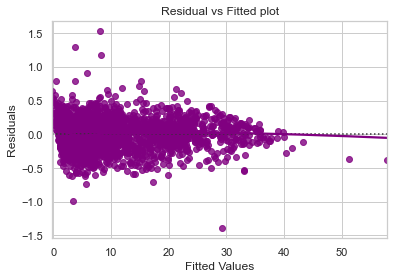

<IPython.core.display.Javascript object>

In [74]:
sns.set_style("whitegrid")
sns.residplot(fitted, residual, color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual vs Fitted plot")
plt.show()

This scatter plot shows the distribution of residuals against the fitted values. If a pattern exist then that is a sign of non-linearity. While there is some pattern towards the far right, the majority of the plot has not pattern and the assumption is satisfied. 


The pattern towards the far right can be explained by the lack of data for higher end/more expensive cars. Because of this, the model is best for predicting the price for lower/middle range cars.

**Test for Noramilty**

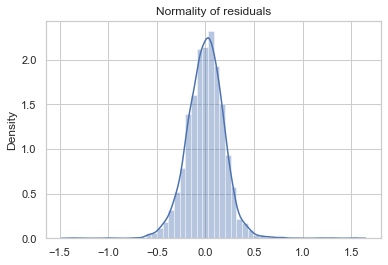

<IPython.core.display.Javascript object>

In [75]:
# plot residuals
sns.distplot(residual)
plt.title("Normality of residuals")
plt.show()

The residuals appear to be following a normal distribution, this can be checked further with a QQ plot.

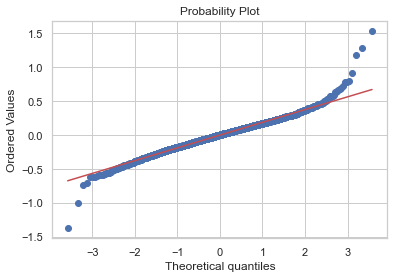

<IPython.core.display.Javascript object>

In [76]:
stats.probplot(residual, dist="norm", plot=pylab)
plt.show()

The QQ plot approximately follows a straight line and therefore we can say that the residuals are normal.

**Test for Homoscedasticity**

In [77]:
# use the goldfeldquandt test
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residual, X_train)
lzip(name, test)

[('F statistic', 1.0311730050060397), ('p-value', 0.24940254785261723)]

<IPython.core.display.Javascript object>

The p-value is greater than 0.05, therefore we can say that the residuals are homoscedastic and that the assuption of linearity is valid.

## Predicting on Test Data

In [78]:
X_train2.columns

Index(['const', 'Mileage', 'Seats', 'Car_Age', 'Power_log',
       'Kilometers_Driven_log', 'Region_North', 'Region_South', 'Region_West',
       'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third',
       'Transmission_Manual', 'Brand_Audi', 'Brand_Bmw', 'Brand_Chevrolet',
       'Brand_Datsun', 'Brand_Fiat', 'Brand_Force', 'Brand_Ford',
       'Brand_Honda', 'Brand_Hyundai', 'Brand_Isuzu', 'Brand_Jaguar',
       'Brand_Jeep', 'Brand_Land', 'Brand_Mahindra', 'Brand_Maruti',
       'Brand_Mercedes-Benz', 'Brand_Mini', 'Brand_Mitsubishi', 'Brand_Nissan',
       'Brand_Porsche', 'Brand_Renault', 'Brand_Skoda', 'Brand_Tata',
       'Brand_Toyota', 'Brand_Volkswagen', 'Brand_Volvo'],
      dtype='object')

<IPython.core.display.Javascript object>

In [79]:
# Selecting columns from test data that we used to create our final model
X_test_final = X_test[X_train2.columns]

<IPython.core.display.Javascript object>

In [80]:
X_test_final.head()

,const,Mileage,Seats,Car_Age,Power_log,Kilometers_Driven_log,Region_North,Region_South,Region_West,Fuel_Type_Diesel,...,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
3828,1.0,18.90,5.0,6,4.220977,10.824388,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2020,1.0,15.60,5.0,7,4.262962,9.986357,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
953,1.0,21.40,5.0,5,4.432007,9.611195,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1648,1.0,16.98,5.0,8,4.206184,11.011852,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1561,1.0,19.67,5.0,4,4.845761,10.565350,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [81]:
# Checking model performance on train set
print("Train Performance\n")
model_perf(olsres1, X_train2.values, y_train)

Train Performance



,MAE,MAPE,RMSE,R^2
0,1.408953,18.452945,2.506725,0.899895


<IPython.core.display.Javascript object>

In [82]:
# Checking model performance on test set
print("Test Performance\n")
model_perf(olsres1, X_test_final.values, y_test)

Test Performance



,MAE,MAPE,RMSE,R^2
0,1.309502,17.749335,2.30476,0.908018


<IPython.core.display.Javascript object>

**Insights**
* The model has a low RMSE and MAE scores for both the test and train data. The errors for both are also comparable so we can confidently say there's no overfitting.
* The model was able to explain 90% of the variation in the test data and according to the MAPE we can predict within 18% of the price which is not bad.

In [83]:
# print the model summary
olsmod1 = sm.OLS(y_train, X_train2)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     1156.
Date:                Sat, 19 Jun 2021   Prob (F-statistic):               0.00
Time:                        03:30:25   Log-Likelihood:                 958.21
No. Observations:                3968   AIC:                            -1832.
Df Residuals:                    3926   BIC:                            -1568.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

<IPython.core.display.Javascript object>

## Business Recommendations

* I reccommended the business focus on lower to mid range cars to resale. These cars more accessible to the general public since they are more affordable and a lower price is a huge inscentive to buying a used car. In addition to this, the model created here is best suited for predicting prices for lower to middle ranged cars and shouldn't be used for higher-end cars until further refinement with more data on those cars is done.
* I reccommended to focus on cars younger than a decade, as older cars are worth significantly less and won't be as profitable.
* There are a lot more manual cars in the market, however automatic cars are valued higher. I'd reccomend focusing on automatic cars as they are more profitable and there's not as much competition. 